## Module Installation

In [2]:
!pip install keras
! pip install scipy
! pip install  sklearn
! pip install tensorflow


## Mount G-Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')
print('Done')

Mounted at /content/drive
Done


## Import module

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error,make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import random
import plotly.graph_objects as go
import plotly.express as px
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import tensorflow as tf
import os
from keras.regularizers import l1,l2
from keras.layers import Dropout
from sklearn.metrics import r2_score
sns.set_style('darkgrid')

## Detail of Attributed


1) price price in US dollars (\$326--\$18,823)

2) carat weight of the diamond (0.2--5.01)

3) cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

4) color diamond colour, from J (worst) to D (best)

5) clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

6) x length in mm (0--10.74)

7) y width in mm (0--58.9)

8) z depth in mm (0--31.8)

9) depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

10 ) table width of top of diamond relative to widest point (43--95)

## Data Loaded

In [5]:
df_diamond = pd.read_csv('/content/drive/MyDrive/Deep_learnning_lab/Deep_project/diamonds.csv',index_col = 'Unnamed: 0')


## Data Description

In [6]:
df_diamond.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [7]:
df_diamond.shape

(53940, 10)

In [8]:
## check mising value
df_diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
df_diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
df_diamond_price  = df_diamond.copy()
df_diamond_class = df_diamond.copy()

## Check Data Duplicated Value and Removed

In [11]:
## Check duplicated 
df_diamond_price.duplicated().sum()

146

In [12]:
## Remove duplicated
df_diamond_price = df_diamond_price.loc[~df_diamond_price.duplicated()]

In [13]:
df_diamond_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [14]:
## after remove duplicated 
df_diamond_price.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Check Data (x,y,z) = 0 or Daimension = 0 (Impossible value) and Removed

In [15]:
## check x,y,z = 0  (high,wide,lengh) is not possible with  actually dimension  
check_zero =  ((df_diamond_price.x == 0 )| (df_diamond_price.y == 0) | (df_diamond_price.z == 0))
check_zero.sum()

19

In [16]:
### Remove zero dimension 
df_diamond_price =  df_diamond_price.loc[~check_zero]

In [17]:
df_diamond_price.count()

carat      53775
cut        53775
color      53775
clarity    53775
depth      53775
table      53775
price      53775
x          53775
y          53775
z          53775
dtype: int64

In [18]:
df_diamond_price[['cut']].value_counts()

cut      
Ideal        21485
Premium      13737
Very Good    12068
Good          4888
Fair          1597
dtype: int64

## Data Exploratory (EDA) 
plot graph seaborn plot

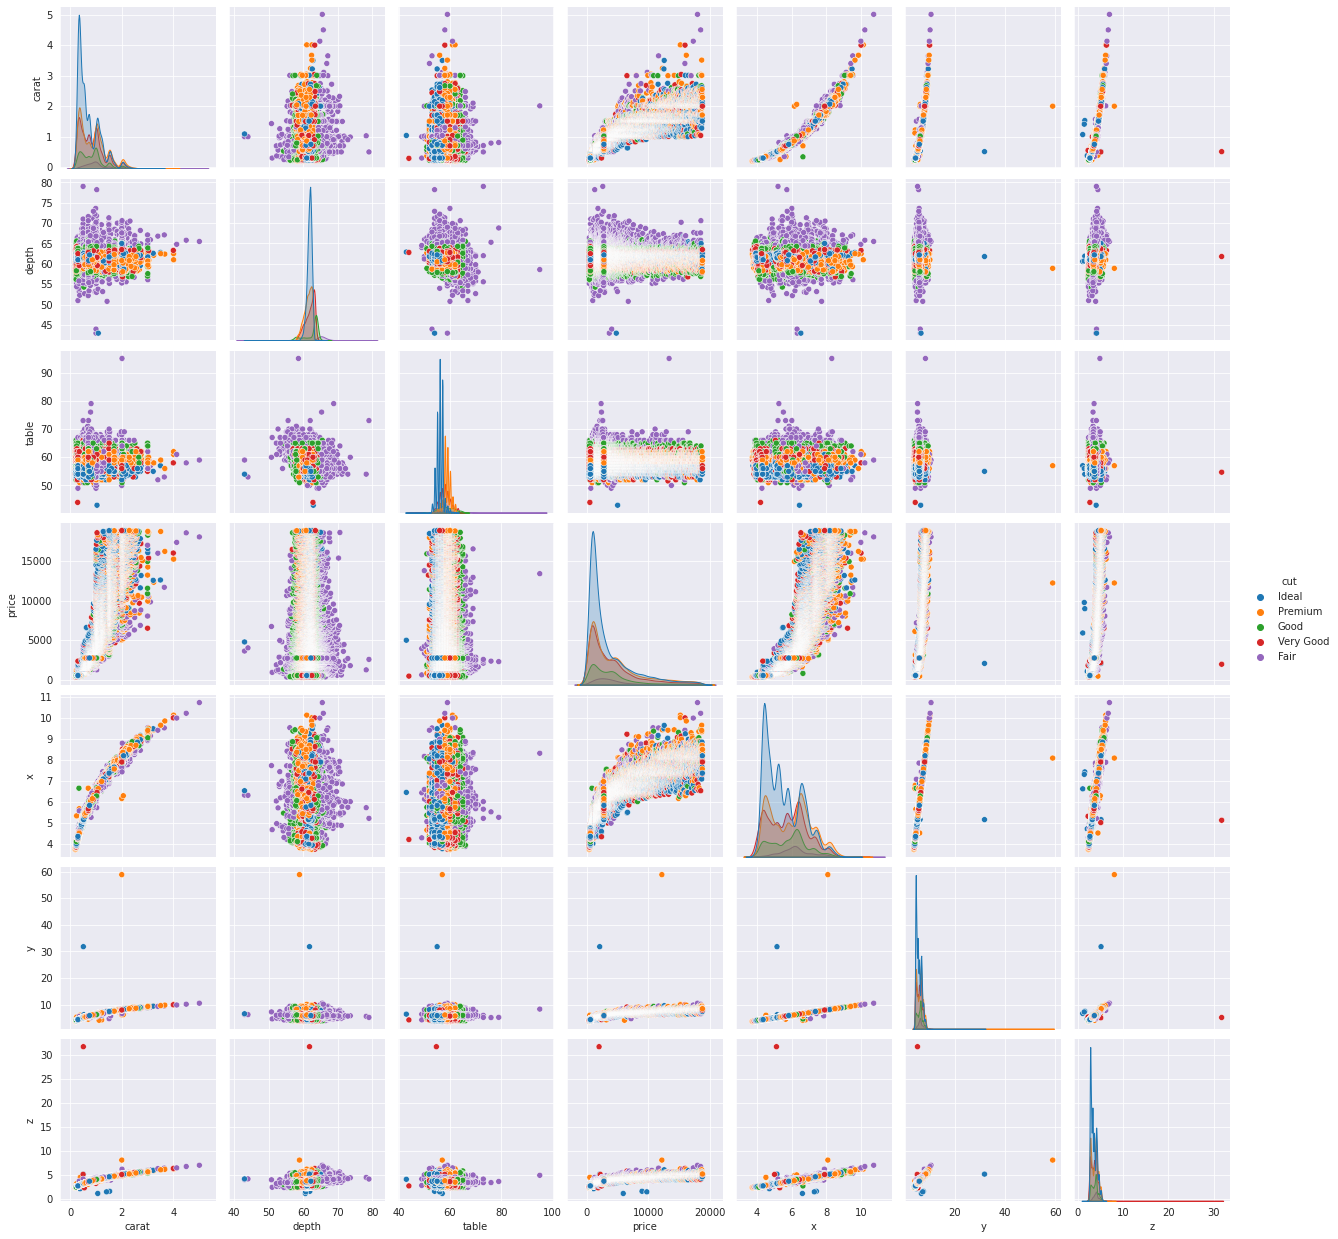

In [19]:
%matplotlib inline
sns.pairplot(df_diamond_price,hue="cut")
#sns.pairplot(df_diamond_price,hue="cut",height = 5,markers=["o", "s", "D","G","W"])
#sns.pairplot(df_diamond_price)

In [20]:
df_diamond_price.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

## Columns Name

In [21]:
df_diamond_price = df_diamond_price[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price']]

## Correlation Plot

In [22]:
corelations  = df_diamond_price.corr()
corelations

,carat,depth,table,x,y,z,price
carat,1.000000,0.027889,0.181113,0.977857,0.953980,0.961030,0.921548
depth,0.027889,1.000000,-0.297580,-0.025224,-0.029262,0.094678,-0.011144
table,0.181113,-0.297580,1.000000,0.195451,0.183814,0.151683,0.126666
x,0.977857,-0.025224,0.195451,1.000000,0.974822,0.975382,0.887137
y,0.953980,-0.029262,0.183814,0.974822,1.000000,0.956623,0.867685
z,0.961030,0.094678,0.151683,0.975382,0.956623,1.000000,0.868030
price,0.921548,-0.011144,0.126666,0.887137,0.867685,0.868030,1.000000


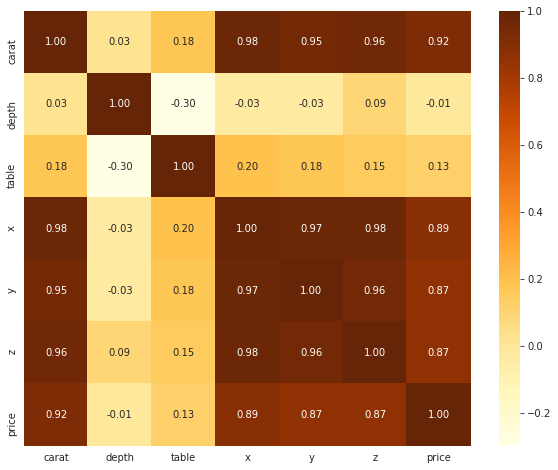

In [23]:
## plot corelation graph 
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corelations, cmap='YlOrBr', annot=True, fmt=".2f")

## Created Dummy with Category Variable 

In [24]:
## crated dummpy with  category variable 
df_diamond_price = pd.get_dummies(data = df_diamond_price,drop_first = True)
df_diamond_price.head(10)


,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,3.95,3.98,2.43,326,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,3.89,3.84,2.31,326,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,4.05,4.07,2.31,327,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,4.20,4.23,2.63,334,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,4.34,4.35,2.75,335,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
6,0.24,62.8,57.0,3.94,3.96,2.48,336,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
7,0.24,62.3,57.0,3.95,3.98,2.47,336,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
8,0.26,61.9,55.0,4.07,4.11,2.53,337,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
9,0.22,65.1,61.0,3.87,3.78,2.49,337,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
10,0.23,59.4,61.0,4.00,4.05,2.39,338,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


### X_Dataset and Y_Label and Train , Test Dataset split

In [25]:
## Train test split
x= df_diamond_price.drop('price',axis = 1)
y = df_diamond_price.loc[:,'price']


In [26]:
X_train,X_test, y_train ,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

### Standardize and normalize 

In [28]:
sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
X_train_scaled =  sc.fit_transform(X_train.loc[:,['carat','depth','table','x','y','z']])
X_train_scaled = pd.DataFrame(X_train_scaled,columns=['carat','depth','table','x','y','z'],index=X_train.index)

X_test_scaled =  sc.transform(X_test.loc[:,['carat','depth','table','x','y','z']])
X_test_scaled = pd.DataFrame(X_test_scaled,columns=['carat','depth','table','x','y','z'],index=X_test.index)


X_train_scale_final = X_train.copy()
X_test_scale_final = X_test.copy()


X_train_scale_final.loc[:,['carat','depth','table','x','y','z']] = X_train_scaled.loc[:,['carat','depth','table','x','y','z']]
X_test_scale_final.loc[:,['carat','depth','table','x','y','z']] = X_test_scaled.loc[:,['carat','depth','table','x','y','z']]


In [44]:
X_test_scale_final

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
32547,-1.113335,0.105580,-0.203777,-1.385122,-1.380692,-1.360812,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2677,-0.205132,-0.174777,-1.097919,-0.027046,0.005198,-0.027459,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
22910,1.505669,-1.085937,1.137436,1.581202,1.434670,1.334263,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
12024,0.660829,0.876562,-0.650848,0.786013,0.728650,0.866171,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
16371,-0.986609,-0.945758,1.137436,-1.179624,-1.110487,-1.218966,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17217,1.167733,-0.034598,0.690365,1.179140,1.181897,1.164048,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
52924,-0.458584,-0.174777,-0.650848,-0.321892,-0.291155,-0.325336,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
35279,-0.627552,0.385937,-1.097919,-0.589933,-0.543928,-0.523920,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
31970,-1.134456,0.385937,-0.650848,-1.474469,-1.424273,-1.403366,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


## Model Building

In [34]:
## Model building 
model = Sequential()  
model.add(Dense(512,activation='relu',input_dim= X_train_scale_final.shape[1]))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               12288     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total params: 184,833
Trainable params: 184,833
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='adam', loss = 'mse')

## Data Model Fitting

In [48]:
model_fit = model.fit(x = X_train_scale_final,y = y_train,validation_data=(X_test_scale_final,y_test),epochs = 200,batch_size=512)

Epoch 1/200
85/85 [==============================] - 2s 19ms/step - loss: 233725.8750 - val_loss: 317105.5938
Epoch 2/200
85/85 [==============================] - 1s 18ms/step - loss: 253857.9375 - val_loss: 283969.1875
Epoch 3/200
85/85 [==============================] - 2s 18ms/step - loss: 237845.4531 - val_loss: 305481.7188
Epoch 4/200
85/85 [==============================] - 2s 18ms/step - loss: 242624.6875 - val_loss: 409129.4688
Epoch 5/200
85/85 [==============================] - 2s 18ms/step - loss: 252575.5781 - val_loss: 280483.8438
Epoch 6/200
85/85 [==============================] - 2s 18ms/step - loss: 233878.6719 - val_loss: 280409.9688
Epoch 7/200
85/85 [==============================] - 2s 18ms/step - loss: 226536.3594 - val_loss: 277987.6875
Epoch 8/200
85/85 [==============================] - 1s 18ms/step - loss: 227440.9219 - val_loss: 298023.0938
Epoch 9/200
85/85 [==============================] - 2s 18ms/step - loss: 230580.2188 - val_loss: 284712.4062
Epoch 10/2

## Model Prediction 

In [94]:
y_pred = model.predict(X_test_scale_final)
y_pred_1 = []
for i in y_pred :
    for ii in i :
      y_pred_1.append(ii)    

[786.45483,
 3378.132,
 10348.476,
 5856.5527,
 704.84766,
 689.8944,
 10808.77,
 763.06396,
 804.5417,
 1243.7362,
 659.2284,
 682.6366,
 2137.225,
 853.60315,
 3407.2776,
 696.79614,
 1787.8931,
 3903.193,
 771.85583,
 4499.134,
 2085.086,
 4090.1995,
 3095.3967,
 775.01337,
 505.0636,
 1788.4214,
 2633.0325,
 3113.4187,
 3165.9348,
 7148.861,
 6255.367,
 15812.813,
 788.308,
 2190.1404,
 4230.993,
 1054.531,
 4531.78,
 1342.0345,
 6347.74,
 1391.6498,
 4897.0054,
 929.7339,
 4349.067,
 699.2584,
 3637.8225,
 2222.3608,
 1014.8606,
 7185.831,
 2566.3982,
 3082.1982,
 1436.973,
 1338.2203,
 4404.4814,
 1010.8085,
 18497.66,
 1946.1198,
 753.93274,
 4774.713,
 2764.4358,
 14452.116,
 858.3313,
 988.34863,
 2827.8535,
 6073.571,
 2728.2212,
 821.94336,
 544.4314,
 5185.037,
 6828.182,
 5701.0405,
 1047.4884,
 811.9852,
 534.43115,
 9486.087,
 5437.675,
 4393.548,
 1896.9554,
 11085.054,
 5299.794,
 6184.9985,
 4980.2676,
 876.9391,
 894.4832,
 15936.167,
 662.121,
 3470.0,
 1891.4241,
 

In [64]:
y_test_end = np.array(y_test)
y_test_end

array([  799,  3239, 10951, ...,   895,   452,   439])

## Comparison Result  Actual Price VS Predicted Price 

In [248]:
check = pd.DataFrame({'Actual(USD)':y_test_end ,'Predict(USD)':y_pred_1,'Difference(USD)':abs(y_test_end-y_pred_1)} , columns=['Actual(USD)','Predict(USD)','Difference(USD)'], index=y_test.index )
check
print('Specify parameter base approch ')
#check_gsd = pd.DataFrame({'Actual(USD)':y_test_end ,'Predict(USD)':y_pred_GSD_F,'Difference(USD)':abs(y_test_end-y_pred_GSD_F)} , columns=['Actual(USD)','Predict(USD)','Difference(USD)'], index=y_test.index )
check.sort_index(ascending=True).head(10)

Specify parameter base approch 


,Actual(USD),Predict(USD),Difference(USD)
5,335,-3421.744962,3756.744962
7,336,-343.741918,679.741918
8,337,-1003.403383,1340.403383
32,402,387.078570,14.921430
35,402,635.394403,233.394403
39,403,471.698352,68.698352
41,403,-2017.108534,2420.108534
42,403,-1945.199633,2348.199633
50,404,-1971.912825,2375.912825
53,404,-1076.405874,1480.405874


## Result Performance with  MSE and R2_SCORE  DNN Model Defind parameter

In [194]:
print('*'*15,'Specify Parameter DNN Model','*'*15)
print(f"Mean Square Error Deep_learning : {mean_squared_error(y_test,y_pred) ** 0.5}")
print(f'R2 Score :{r2_score(y_test, y_pred)}' )


*************** Specify Parameter DNN Model ***************
Mean Square Error Deep_learning : 563.0169549703736
R2 Score :0.9799415665761724


## Model With Traditional model  Linear Regression  and Result Performance 

In [193]:
lr = LinearRegression()
lr.fit(X_train_scale_final,y_train)
y_pred_1 = lr.predict(X_test_scale_final)

mse = (mean_squared_error(y_test,y_pred_1)) 

rmse = mse**.5

print('*'*15,'Linear Regression Model','*'*15)
print(f"Mean Square Error LinearRegression : {rmse}")
print(f'R2 Score : {r2_score(y_test, y_pred_1)}' )

*************** Linear Regression Model ***************
Mean Square Error LinearRegression : 1128.9110798751835
R2 Score : 0.9193557262563594


## Show Model Performance with  loss value

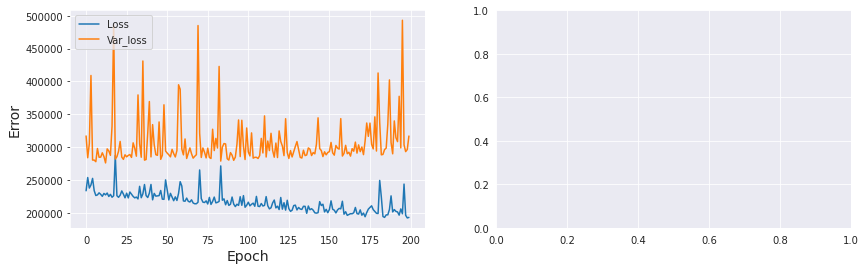

In [111]:
f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(model_fit.history['loss'])
axes[0].plot(model_fit.history['val_loss'])
axes[0].set_xlabel('Epoch', fontsize=14)
axes[0].set_ylabel('Error', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].legend(['Loss', 'Var_loss'], loc='upper left')


## Scatter Plot Graph  Actual [Prices] VS Predicition [Prices]

max_value :22500.619140625


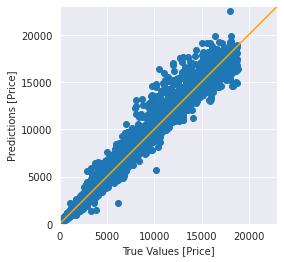

In [143]:
y_pred_flat = model.predict(X_test_scale_final).flatten()
print(f'max_value :{max(y_pred_flat)}')
figsize=(18,20)
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_flat)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
lims = [0, 23000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims,color='orange')

## Show Error distribution graph with  define parameter

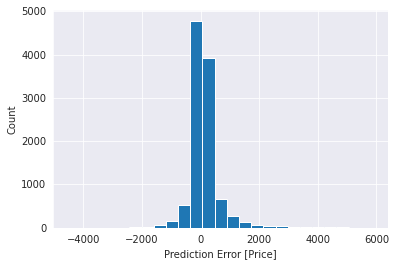

In [139]:
error = y_pred_flat - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Price]')
_ = plt.ylabel('Count')

## Model downloaded

In [140]:
model.save('./content/drive/MyDrive/Deep_learnning_lab/price_model')

INFO:tensorflow:Assets written to: ./content/drive/MyDrive/Deep_learnning_lab/price_model/assets


# Grid Search

### Grid Search Parameter finding the best  parameter 
Defind model with function and find the best parameter that provide the minimum loss (RME/R2 Score)    

In [181]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
import numpy as np
#### Defind Model with  function ###########
def model_grid(optimizer='adam', len_featrure=list(X_train.shape)[1]):
  model_g = Sequential()  
  model_g.add(Dense(512,activation='relu',input_dim= X_train_scale_final.shape[1]))
  model_g.add(Dense(256,activation='relu'))
  model_g.add(Dense(128,activation='relu'))
  model_g.add(Dense(64,activation='relu'))
  #model.add(Dropout(0.2))
  model_g.add(Dense(1,activation='linear'))
  model_g.compile(optimizer='adam', loss = 'mse',metrics=['mse'])
  return model_g  #compile(loss='mean_squared_error', optimizer=optimizer,metrics=['mse'])

####### Grid Search  Parameter set parameter value 
model22 = KerasRegressor(build_fn=model_grid)
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
optimizer = ['SGD', 'RMSprop', 'Adagrad',  'Adam', 'Adamax']
epochs = [50, 100, 150,200]
batches = [32,64,128,512]
#epochs = 200,batch_size=512
param_grid = dict(optimizer=optimizer, nb_epoch=epochs, batch_size=batches)
grid = GridSearchCV(estimator=model22, param_grid=param_grid,n_jobs=1)
grid_result = grid.fit(X_train, y_train)


1345/1345 [==============================] - 8s 6ms/step - loss: 10233358.9714 - mse: 10233358.9714


## GRID SEARCH  RESULT

FInding the best parameter that get the minimize RME

In [183]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -1354248.562500 using {'batch_size': 32, 'nb_epoch': 50, 'optimizer': 'Adam'}


## Parameter Setting from  GridSearch Approch  

In [184]:
model = Sequential()  
model.add(Dense(512,activation='relu',input_dim= X_train_scale_final.shape[1]))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='Adam', loss = 'mse')

## Model Fitting with Grid_search 

In [185]:
model_fit2 = model.fit(x = X_train_scale_final,y = y_train,validation_data=(X_test_scale_final,y_test),epochs = 50,batch_size=32)

Epoch 1/50
1345/1345 [==============================] - 8s 5ms/step - loss: 5936905.2091 - val_loss: 779069.9375
Epoch 2/50
1345/1345 [==============================] - 7s 5ms/step - loss: 789830.6414 - val_loss: 678600.5000
Epoch 3/50
1345/1345 [==============================] - 7s 5ms/step - loss: 651611.5241 - val_loss: 508268.8438
Epoch 4/50
1345/1345 [==============================] - 7s 5ms/step - loss: 562528.2810 - val_loss: 468085.8125
Epoch 5/50
1345/1345 [==============================] - 7s 5ms/step - loss: 495930.1738 - val_loss: 427213.0312
Epoch 6/50
1345/1345 [==============================] - 7s 5ms/step - loss: 447058.1489 - val_loss: 415723.2812
Epoch 7/50
1345/1345 [==============================] - 7s 5ms/step - loss: 392438.5657 - val_loss: 351937.2500
Epoch 8/50
1345/1345 [==============================] - 7s 5ms/step - loss: 390231.0225 - val_loss: 326299.9062
Epoch 9/50
1345/1345 [==============================] - 7s 5ms/step - loss: 356223.5711 - val_loss: 402

## Prediction with  X_Test data

In [188]:
y_pred_GSD = model.predict(X_test_scale_final)
y_pred_GSD
y_pred_GSD_F = []
for i in y_pred_GSD :
    for ii in i :
      y_pred_GSD_F.append(ii)   

## Result with Grid Search Parameter Approch

In [245]:
print('Grid Search approch ')
check_gsd = pd.DataFrame({'Actual(USD)':y_test_end ,'Predict(USD)':y_pred_GSD_F,'Difference(USD)':abs(y_test_end-y_pred_GSD_F)} , columns=['Actual(USD)','Predict(USD)','Difference(USD)'], index=y_test.index )
#check_gsd.sort_values('Difference(USD)', ascending=True).head(10)
check_gsd.sort_index( ascending=True).head(10)

Grid Search approch 


,Actual(USD),Predict(USD),Difference(USD)
5,335,336.074219,1.074219
7,336,438.114868,102.114868
8,337,393.332733,56.332733
32,402,409.774780,7.774780
35,402,343.094269,58.905731
39,403,400.464264,2.535736
41,403,496.129517,93.129517
42,403,494.555634,91.555634
50,404,373.603577,30.396423
53,404,508.685883,104.685883


## Model Performance with  loss value

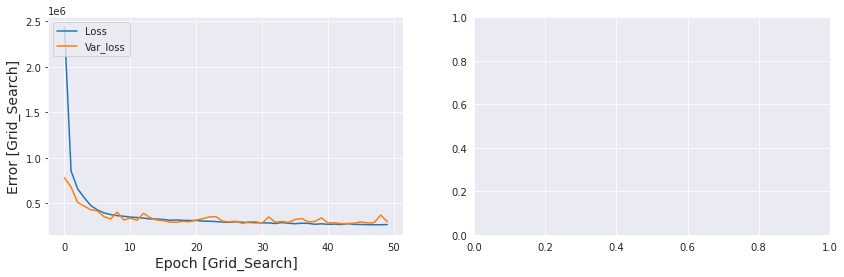

In [212]:
f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(model_fit2.history['loss'])
axes[0].plot(model_fit2.history['val_loss'])
axes[0].set_xlabel('Epoch [Grid_Search]', fontsize=14)
axes[0].set_ylabel('Error [Grid_Search]', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].legend(['Loss', 'Var_loss'], loc='upper left')


## Performance Result with  MSE and R2_Score value Grid Search approach

In [191]:
print('*'*15,'Grid Search Parameter','*'*15)
print(f"Mean Square Error Deep_learning : {mean_squared_error(y_test,y_pred_GSD_F) ** 0.5}")
print(f'R2 Score :{r2_score(y_test, y_pred_GSD_F)}' )

*************** Grid Search Parameter ***************
Mean Square Error Deep_learning : 545.5787177481428
R2 Score :0.98116485769992


### Scatter plot with Actual[Prices] VS Prediction [Prices]

max_value :22500.619140625


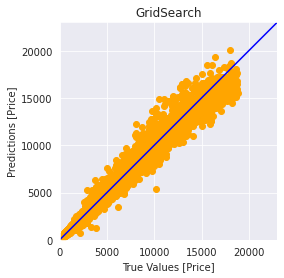

In [235]:
y_pred_flat_grid = model.predict(X_test_scale_final).flatten()
print(f'max_value :{max(y_pred_flat)}')
figsize=(18,20)
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_flat_grid,color= 'orange')
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.title('GridSearch')
lims = [0, 23000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims,color='blue')

## Error Distributation Graph with Grid_Search  Approach 

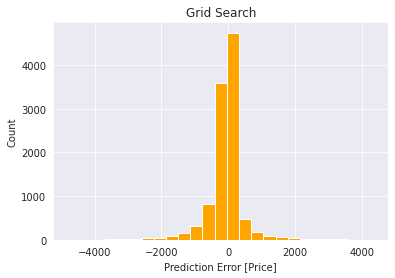

In [239]:
error = y_pred_flat_grid - y_test
plt.hist(error, bins=25,color = 'orange')
plt.xlabel('Prediction Error [Price]')
plt.title('Grid Search')
_ = plt.ylabel('Count')

## Saved Model

In [197]:
## Save Model 
model.save('./content/drive/MyDrive/Deep_learnning_lab/price_model_Grid')

INFO:tensorflow:Assets written to: ./content/drive/MyDrive/Deep_learnning_lab/price_model_Grid/assets


## Test Reload model

In [200]:
## reload data model 
reloaded = tf.keras.models.load_model('./content/drive/MyDrive/Deep_learnning_lab/price_model_Grid')

model_reload= reloaded.evaluate(
    X_test, y_test, verbose=0)
    

In [204]:
y_pred_GSD_test = reloaded.predict(X_test_scale_final)

In [206]:
print('*'*15,'Grid Search Parameter','*'*15)
print(f"Mean Square Error Deep_learning : {mean_squared_error(y_test,y_pred_GSD_test) ** 0.5}")
print(f'R2 Score :{r2_score(y_test, y_pred_GSD_test)}' )

*************** Grid Search Parameter ***************
Mean Square Error Deep_learning : 545.5787177481428
R2 Score :0.98116485769992
